##### 필요한 라이브러리 불러오기

In [216]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

##### csv파일 업로드

In [134]:
orders = pd.read_csv('orders.csv')
order_items = pd.read_csv('order_items.csv')
products = pd.read_csv('products.csv')
payments = pd.read_csv('payments.csv')
customers = pd.read_csv('customers.csv')
capstone_data_cleaned = pd.read_csv('capstone_data_cleaned.csv')

#### orders 주문 테이블

In [135]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,delivered,10/2/2017 10:56,10/2/2017 11:07,10/10/2017 21:25,10/18/2017 0:00
1,53cdb2fc8bc7dce0b6741e2150273451,af07308b275d755c9edb36a90c618231,delivered,7/24/2018 20:41,7/26/2018 3:24,8/7/2018 15:27,8/13/2018 0:00
2,47770eb9100c2d0c44946d9cf07ec65d,3a653a41f6f9fc3d2a113cf8398680e8,delivered,8/8/2018 8:38,8/8/2018 8:55,8/17/2018 18:06,9/4/2018 0:00
3,949d5b44dbf5de918fe9c16f97b45f8a,7c142cf63193a1473d2e66489a9ae977,delivered,11/18/2017 19:28,11/18/2017 19:45,12/2/2017 0:28,12/15/2017 0:00
4,ad21c59c0840e6cb83a9ceb5573f8159,72632f0f9dd73dfee390c9b22eb56dd6,delivered,2/13/2018 21:18,2/13/2018 22:20,2/16/2018 18:17,2/26/2018 0:00


In [136]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_timestamp      96476 non-null  object
 6   order_estimated_delivery_date  99441 non-null  object
dtypes: object(7)
memory usage: 5.3+ MB


In [137]:
orders['order_status'].unique()

array(['delivered', 'invoiced', 'shipped', 'processing', 'unavailable',
       'canceled', 'created', 'approved'], dtype=object)

#### order_status
##### delivered, 고객에게 배송완료된 상태
##### invoiced, 주문 청구서 생성(배송 전)
##### shipped, 배송 출발
##### processing, 주문 처리중
##### unavailable,주문 이용불가(재고소진?)
##### canceled, 주문 취소
##### created, 주문 저장 초기 상태
##### approved 주문 승인

In [138]:
# 결측치 확인
orders.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_timestamp        2965
order_estimated_delivery_date       0
dtype: int64

##### order_approved_at          160 판매자 주문 승인 시점 
##### order_delivered_timestamp 2965 고객에게 배송된 시점
### order_purchase_timestamp  고객이 주문한 시점 테이블이랑 
### order_estimated_delivery_date 예상 배송날짜 테이블이 있으니까 두가지 결측치는 제거함

In [139]:
# 결측티 제거 전
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_timestamp      96476 non-null  object
 6   order_estimated_delivery_date  99441 non-null  object
dtypes: object(7)
memory usage: 5.3+ MB


In [140]:
# 결측치 제거
orders.dropna(subset=['order_approved_at','order_delivered_timestamp'],inplace=True)
orders.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96462 entries, 0 to 99440
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       96462 non-null  object
 1   customer_id                    96462 non-null  object
 2   order_status                   96462 non-null  object
 3   order_purchase_timestamp       96462 non-null  object
 4   order_approved_at              96462 non-null  object
 5   order_delivered_timestamp      96462 non-null  object
 6   order_estimated_delivery_date  96462 non-null  object
dtypes: object(7)
memory usage: 5.9+ MB


In [141]:
# 결측치 합
print(2965+160)
# 결측치 제거 전 후 수 비교
print(99441-96462)
# 중복된 결측치
print(3125-2979)
# 전 - 결측치 = 후
print(99441-2979)

3125
2979
146
96462


In [142]:
# 결측치 제거 후 oreder_status는 두가지만 남음
orders['order_status'].unique()

array(['delivered', 'canceled'], dtype=object)

#####
order_purchase_timestamp 고객이 주문한 시점
order_approved_at 판매자 주문 승인 시점  
order_delivered_timestamp 고객에게 배송된 시점
order_estimated_delivery_date 예상 배송 날짜

In [143]:
# 데이터 형식 바꾸기
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'], errors = 'coerce')
orders['order_approved_at'] = pd.to_datetime(orders['order_approved_at'], errors = 'coerce')
orders['order_delivered_timestamp'] = pd.to_datetime(orders['order_delivered_timestamp'], errors = 'coerce')
orders['order_estimated_delivery_date'] = pd.to_datetime(orders['order_estimated_delivery_date'], errors = 'coerce')
# orders['order_status'] = orders['order_status'].astype('object')
orders.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96462 entries, 0 to 99440
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       96462 non-null  object        
 1   customer_id                    96462 non-null  object        
 2   order_status                   96462 non-null  object        
 3   order_purchase_timestamp       96462 non-null  datetime64[ns]
 4   order_approved_at              96462 non-null  datetime64[ns]
 5   order_delivered_timestamp      96462 non-null  datetime64[ns]
 6   order_estimated_delivery_date  96462 non-null  datetime64[ns]
dtypes: datetime64[ns](4), object(3)
memory usage: 5.9+ MB


In [212]:
orders.describe()

,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date
count,96462,96462,96462,96462
mean,2018-01-01 23:51:32.335012864,2018-01-02 10:08:14.744044288,2018-01-14 13:15:50.903153408,2018-01-25 17:32:09.091248384
min,2016-09-15 12:16:00,2016-09-15 12:16:00,2016-10-11 13:46:00,2016-10-04 00:00:00
25%,2017-09-14 09:29:15,2017-09-14 14:30:00,2017-09-25 22:31:45,2017-10-05 00:00:00
50%,2018-01-20 19:56:00,2018-01-22 13:48:30,2018-02-02 19:49:00,2018-02-16 00:00:00
75%,2018-05-05 18:32:30,2018-05-06 10:30:00,2018-05-15 23:06:45,2018-05-28 00:00:00
max,2018-08-29 15:00:00,2018-08-29 15:10:00,2018-10-17 13:22:00,2018-10-25 00:00:00


In [144]:
# 날짜 데이터 이상치확인
# 역방향이면 이상치로 의심
Check_date_outliers = orders[
    (orders['order_purchase_timestamp'] > orders['order_approved_at']) |
    (orders['order_approved_at'] > orders['order_delivered_timestamp']) 
]
print(len(Check_date_outliers))

61


In [145]:
# 이상치 의심 데이터 확인
Check_date_outliers.head().T

,199,483,1986,3659,11738
order_id,58d4c4747ee059eeeb865b349b41f53a,4df92d82d79c3b52c7138679fa9b07fc,6e57e23ecac1ae881286657694444267,f222c56f035b47dfa1e069a88235d730,cf72398d0690f841271b695bbfda82d2
customer_id,a5314ac290a8b141491e987ae37aa7cc,cd2624b9b75d83efb640f7204232511e,71692b73230707ce0f95d8a6091c22b4,398957fce766920db4c4b206d7c9aa85,0a230b3fdaae7f47c5a5c39a4b73a340
order_status,delivered,delivered,delivered,delivered,delivered
order_purchase_timestamp,2018-07-21 12:49:00,2018-07-24 11:32:00,2018-08-09 17:36:00,2018-01-30 09:43:00,2017-09-01 18:45:00
order_approved_at,2018-07-26 23:31:00,2018-07-29 23:30:00,2018-08-20 15:55:00,2018-02-04 23:31:00,2017-09-13 22:04:00
order_delivered_timestamp,2018-07-25 23:58:00,2018-07-27 18:55:00,2018-08-17 16:45:00,2018-02-01 20:10:00,2017-09-11 14:15:00
order_estimated_delivery_date,2018-07-31 00:00:00,2018-08-06 00:00:00,2018-09-06 00:00:00,2018-02-15 00:00:00,2017-09-21 00:00:00


In [146]:
# 날짜 데이터 이상치 의심 더 쪼개기
a =Check_date_outliers[Check_date_outliers['order_purchase_timestamp'] > Check_date_outliers['order_approved_at']]
b =Check_date_outliers[Check_date_outliers['order_approved_at'] > Check_date_outliers['order_delivered_timestamp']]
# c =Check_date_outliers[Check_date_outliers['order_delivered_timestamp'] < Check_date_outliers['order_estimated_delivery_date']]
# c 배송된 시점보다 예상 배송날짜가 빠를 수도 있음으로 이상치의심에 넣지않음
print(len(a)) # 고객주문 시점보다 판매자 주문 승인 시점이 빠른 경우
print(len(b)) # 판매자 승인 시점보다 배송된 시점이 빠른 경우 
# print(len(c)) # 배송된 시점보다 예상 배송 날짜가 빠른 경우

0
61


In [147]:
delivered_b = b[b['order_status'] == 'delivered']
print(len(delivered_b))
# b 판매자 승인시점보다 배송된 시점이 빨라도 결론적으로 배송완료 상태라서 이상치가 아님

61


In [177]:
# 멀리 떨어진 날짜 간격 확인
date = pd.DataFrame({
    'date_diff_a':(orders['order_approved_at']- orders['order_purchase_timestamp']).dt.days,
    'date_diff_b': (orders['order_delivered_timestamp']- orders['order_approved_at']).dt.days,
    'date_diff_c': (orders['order_estimated_delivery_date']- orders['order_delivered_timestamp']).dt.days
})
date

,date_diff_a,date_diff_b,date_diff_c
0,0,8,7
1,1,12,5
2,0,9,17
3,0,13,12
4,0,2,9
...,...,...,...
99436,0,8,10
99437,0,22,1
99438,0,24,5
99439,0,17,20


In [179]:
orders_date = pd.concat([orders, date], axis=1)
orders_date

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date,date_diff_a,date_diff_b,date_diff_c
0,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,delivered,2017-10-02 10:56:00,2017-10-02 11:07:00,2017-10-10 21:25:00,2017-10-18,0,8,7
1,53cdb2fc8bc7dce0b6741e2150273451,af07308b275d755c9edb36a90c618231,delivered,2018-07-24 20:41:00,2018-07-26 03:24:00,2018-08-07 15:27:00,2018-08-13,1,12,5
2,47770eb9100c2d0c44946d9cf07ec65d,3a653a41f6f9fc3d2a113cf8398680e8,delivered,2018-08-08 08:38:00,2018-08-08 08:55:00,2018-08-17 18:06:00,2018-09-04,0,9,17
3,949d5b44dbf5de918fe9c16f97b45f8a,7c142cf63193a1473d2e66489a9ae977,delivered,2017-11-18 19:28:00,2017-11-18 19:45:00,2017-12-02 00:28:00,2017-12-15,0,13,12
4,ad21c59c0840e6cb83a9ceb5573f8159,72632f0f9dd73dfee390c9b22eb56dd6,delivered,2018-02-13 21:18:00,2018-02-13 22:20:00,2018-02-16 18:17:00,2018-02-26,0,2,9
...,...,...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,6359f309b166b0196dbf7ad2ac62bb5a,delivered,2017-03-09 09:54:00,2017-03-09 09:54:00,2017-03-17 15:08:00,2017-03-28,0,8,10
99437,63943bddc261676b46f01ca7ac2f7bd8,da62f9e57a76d978d02ab5362c509660,delivered,2018-02-06 12:58:00,2018-02-06 13:10:00,2018-02-28 17:37:00,2018-03-02,0,22,1
99438,83c1379a015df1e13d02aae0204711ab,737520a9aad80b3fbbdad19b66b37b30,delivered,2017-08-27 14:46:00,2017-08-27 15:04:00,2017-09-21 11:24:00,2017-09-27,0,24,5
99439,11c177c8e97725db2631073c19f07b62,5097a5312c8b157bb7be58ae360ef43c,delivered,2018-01-08 21:28:00,2018-01-08 21:36:00,2018-01-25 23:32:00,2018-02-15,0,17,20


In [196]:
orders_date[(orders_date['date_diff_a'] < 0) & (orders_date['order_status'] != 'delivered')][['date_diff_a','order_status']]

,date_diff_a,order_status


In [278]:
orders_date[(orders_date['date_diff_b'] < 0) & (orders_date['order_status'] != 'delivered')][['date_diff_b','order_status','order_approved_at','order_delivered_timestamp']]

,date_diff_b,order_status,order_approved_at,order_delivered_timestamp


In [279]:
orders_date[(orders_date['date_diff_c'] < 0) & (orders_date['order_status'] != 'delivered')][['order_id','date_diff_c','order_status','order_delivered_timestamp','order_estimated_delivery_date']]

,order_id,date_diff_c,order_status,order_delivered_timestamp,order_estimated_delivery_date
2921,1950d777989f6a877539f53795b4c3c3,-13,canceled,2018-03-21 22:03:00,2018-03-09


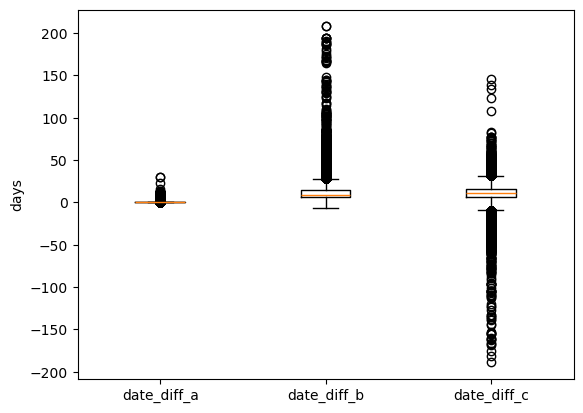

In [195]:
# 날짜 시각화
data = [orders_date['date_diff_a'].tolist(),
        orders_date['date_diff_b'].tolist(),
        orders_date['date_diff_c'].tolist(),
       ]
plt.boxplot(data)
plt.xticks([1,2,3],['date_diff_a','date_diff_b','date_diff_c'])
plt.ylabel('days')
plt.show()

##### date_diff_c가 음수값이 많지만 2921번 빼고는 다 order_status가 deliverd로 되어있음
따라서 이상치로 보지않음

### 🚨 날짜 데이터 이상치 없음